#**Census Data Exploration: Race & Ethnicity in Los Angeles County**

This notebok explores race and ethnicity populations by census tract in Los Angeles County acquired from Census American Community Survey (ACS) 2019 5-year estimate. This data is valuable to our project because it will help us identify demographics in census tracts where mobile homes exists and give us an understanding if there are higher populations of spcecific racial/ethnic groups living in mobile home parks. 

#**Importing Data**

**Step 1**: Import spatial data libraries that will help me create graphs, charts, and maps.

In [10]:
import pandas as pd
import geopandas as gdp
import contextily as ctx
import matplotlib.pyplot as plt

**Step 2:** Import ACS Census data zipfile

In [11]:
race = gdp.read_file('Data/ACS Demographics.zip')

#**Data Exploration**

An overview of the date

In [13]:
#how many rows and columns are in the data
race.shape

(2349, 359)

In [14]:
#next,I'll display the columns
pd.set_option('display.max_columns', None)

In [15]:
#so how does the data look?
race.head()

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0001PE,DP05_0001PM,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,DP05_0003E,DP05_0003M,DP05_0003PE,DP05_0003PM,DP05_0004E,DP05_0004M,DP05_0004PE,DP05_0004PM,DP05_0005E,DP05_0005M,DP05_0005PE,DP05_0005PM,DP05_0006E,DP05_0006M,DP05_0006PE,DP05_0006PM,DP05_0007E,DP05_0007M,DP05_0007PE,DP05_0007PM,DP05_0008E,DP05_0008M,DP05_0008PE,DP05_0008PM,DP05_0009E,DP05_0009M,DP05_0009PE,DP05_0009PM,DP05_0010E,DP05_0010M,DP05_0010PE,DP05_0010PM,DP05_0011E,DP05_0011M,DP05_0011PE,DP05_0011PM,DP05_0012E,DP05_0012M,DP05_0012PE,DP05_0012PM,DP05_0013E,DP05_0013M,DP05_0013PE,DP05_0013PM,DP05_0014E,DP05_0014M,DP05_0014PE,DP05_0014PM,DP05_0015E,DP05_0015M,DP05_0015PE,DP05_0015PM,DP05_0016E,DP05_0016M,DP05_0016PE,DP05_0016PM,DP05_0017E,DP05_0017M,DP05_0017PE,DP05_0017PM,DP05_0018E,DP05_0018M,DP05_0018PE,DP05_0018PM,DP05_0019E,DP05_0019M,DP05_0019PE,DP05_0019PM,DP05_0020E,DP05_0020M,DP05_0020PE,DP05_0020PM,DP05_0021E,DP05_0021M,DP05_0021PE,DP05_0021PM,DP05_0022E,DP05_0022M,DP05_0022PE,DP05_0022PM,DP05_0023E,DP05_0023M,DP05_0023PE,DP05_0023PM,DP05_0024E,DP05_0024M,DP05_0024PE,DP05_0024PM,DP05_0025E,DP05_0025M,DP05_0025PE,DP05_0025PM,DP05_0026E,DP05_0026M,DP05_0026PE,DP05_0026PM,DP05_0027E,DP05_0027M,DP05_0027PE,DP05_0027PM,DP05_0028E,DP05_0028M,DP05_0028PE,DP05_0028PM,DP05_0029E,DP05_0029M,DP05_0029PE,DP05_0029PM,DP05_0030E,DP05_0030M,DP05_0030PE,DP05_0030PM,DP05_0031E,DP05_0031M,DP05_0031PE,DP05_0031PM,DP05_0032E,DP05_0032M,DP05_0032PE,DP05_0032PM,DP05_0033E,DP05_0033M,DP05_0033PE,DP05_0033PM,DP05_0034E,DP05_0034M,DP05_0034PE,DP05_0034PM,DP05_0035E,DP05_0035M,DP05_0035PE,DP05_0035PM,DP05_0036E,DP05_0036M,DP05_0036PE,DP05_0036PM,DP05_0037E,DP05_0037M,DP05_0037PE,DP05_0037PM,DP05_0038E,DP05_0038M,DP05_0038PE,DP05_0038PM,DP05_0039E,DP05_0039M,DP05_0039PE,DP05_0039PM,DP05_0040E,DP05_0040M,DP05_0040PE,DP05_0040PM,DP05_0041E,DP05_0041M,DP05_0041PE,DP05_0041PM,DP05_0042E,DP05_0042M,DP05_0042PE,DP05_0042PM,DP05_0043E,DP05_0043M,DP05_0043PE,DP05_0043PM,DP05_0044E,DP05_0044M,DP05_0044PE,DP05_0044PM,DP05_0045E,DP05_0045M,DP05_0045PE,DP05_0045PM,DP05_0046E,DP05_0046M,DP05_0046PE,DP05_0046PM,DP05_0047E,DP05_0047M,DP05_0047PE,DP05_0047PM,DP05_0048E,DP05_0048M,DP05_0048PE,DP05_0048PM,DP05_0049E,DP05_0049M,DP05_0049PE,DP05_0049PM,DP05_0050E,DP05_0050M,DP05_0050PE,DP05_0050PM,DP05_0051E,DP05_0051M,DP05_0051PE,DP05_0051PM,DP05_0052E,DP05_0052M,DP05_0052PE,DP05_0052PM,DP05_0053E,DP05_0053M,DP05_0053PE,DP05_0053PM,DP05_0054E,DP05_0054M,DP05_0054PE,DP05_0054PM,DP05_0055E,DP05_0055M,DP05_0055PE,DP05_0055PM,DP05_0056E,DP05_0056M,DP05_0056PE,DP05_0056PM,DP05_0057E,DP05_0057M,DP05_0057PE,DP05_0057PM,DP05_0058E,DP05_0058M,DP05_0058PE,DP05_0058PM,DP05_0059E,DP05_0059M,DP05_0059PE,DP05_0059PM,DP05_0060E,DP05_0060M,DP05_0060PE,DP05_0060PM,DP05_0061E,DP05_0061M,DP05_0061PE,DP05_0061PM,DP05_0062E,DP05_0062M,DP05_0062PE,DP05_0062PM,DP05_0063E,DP05_0063M,DP05_0063PE,DP05_0063PM,DP05_0064E,DP05_0064M,DP05_0064PE,DP05_0064PM,DP05_0065E,DP05_0065M,DP05_0065PE,DP05_0065PM,DP05_0066E,DP05_0066M,DP05_0066PE,DP05_0066PM,DP05_0067E,DP05_0067M,DP05_0067PE,DP05_0067PM,DP05_0068E,DP05_0068M,DP05_0068PE,DP05_0068PM,DP05_0069E,DP05_0069M,DP05_0069PE,DP05_0069PM,DP05_0070E,DP05_0070M,DP05_0070PE,DP05_0070PM,DP05_0071E,DP05_0071M,DP05_0071PE,DP05_0071PM,DP05_0072E,DP05_0072M,DP05_0072PE,DP05_0072PM,DP05_0073E,DP05_0073M,DP05_0073PE,DP05_0073PM,DP05_0074E,DP05_0074M,DP05_0074PE,DP05_0074PM,DP05_0075E,DP05_0075M,DP05_0075PE,DP05_0075PM,DP05_0076E,DP05_0076M,DP05_0076PE,DP05_0076PM,DP05_0077E,DP05_0077M,DP05_0077PE,DP05_0077PM,DP05_0078E,DP05_0078M,DP05_0078PE,DP05_0078PM,DP05_0079E,DP05_0079M,DP05_0079PE,DP05_0079PM,DP05_0080E,DP05_0080M,DP05_0080PE,DP05_0080PM,DP05_0081E,DP05_0081M,DP05_0081PE,DP05_0081PM,DP05_0082E,DP05_0082M,DP05_0082PE,DP05_0082PM,DP05_0083E,DP05_0083M,DP05_0083PE,DP05_0083PM,DP05_0084E,DP05_0084M,DP05_0084PE,DP05_0084PM,DP05_0085E,DP05_0085M,DP05_0085PE,DP05_0085PM,DP05_0086E,DP05_0086M,DP05_0086PE,DP05_0086PM,DP05_0087E,DP05_0087M,DP05_0087

In [16]:
race.tail()

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0001PE,DP05_0001PM,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,DP05_0003E,DP05_0003M,DP05_0003PE,DP05_0003PM,DP05_0004E,DP05_0004M,DP05_0004PE,DP05_0004PM,DP05_0005E,DP05_0005M,DP05_0005PE,DP05_0005PM,DP05_0006E,DP05_0006M,DP05_0006PE,DP05_0006PM,DP05_0007E,DP05_0007M,DP05_0007PE,DP05_0007PM,DP05_0008E,DP05_0008M,DP05_0008PE,DP05_0008PM,DP05_0009E,DP05_0009M,DP05_0009PE,DP05_0009PM,DP05_0010E,DP05_0010M,DP05_0010PE,DP05_0010PM,DP05_0011E,DP05_0011M,DP05_0011PE,DP05_0011PM,DP05_0012E,DP05_0012M,DP05_0012PE,DP05_0012PM,DP05_0013E,DP05_0013M,DP05_0013PE,DP05_0013PM,DP05_0014E,DP05_0014M,DP05_0014PE,DP05_0014PM,DP05_0015E,DP05_0015M,DP05_0015PE,DP05_0015PM,DP05_0016E,DP05_0016M,DP05_0016PE,DP05_0016PM,DP05_0017E,DP05_0017M,DP05_0017PE,DP05_0017PM,DP05_0018E,DP05_0018M,DP05_0018PE,DP05_0018PM,DP05_0019E,DP05_0019M,DP05_0019PE,DP05_0019PM,DP05_0020E,DP05_0020M,DP05_0020PE,DP05_0020PM,DP05_0021E,DP05_0021M,DP05_0021PE,DP05_0021PM,DP05_0022E,DP05_0022M,DP05_0022PE,DP05_0022PM,DP05_0023E,DP05_0023M,DP05_0023PE,DP05_0023PM,DP05_0024E,DP05_0024M,DP05_0024PE,DP05_0024PM,DP05_0025E,DP05_0025M,DP05_0025PE,DP05_0025PM,DP05_0026E,DP05_0026M,DP05_0026PE,DP05_0026PM,DP05_0027E,DP05_0027M,DP05_0027PE,DP05_0027PM,DP05_0028E,DP05_0028M,DP05_0028PE,DP05_0028PM,DP05_0029E,DP05_0029M,DP05_0029PE,DP05_0029PM,DP05_0030E,DP05_0030M,DP05_0030PE,DP05_0030PM,DP05_0031E,DP05_0031M,DP05_0031PE,DP05_0031PM,DP05_0032E,DP05_0032M,DP05_0032PE,DP05_0032PM,DP05_0033E,DP05_0033M,DP05_0033PE,DP05_0033PM,DP05_0034E,DP05_0034M,DP05_0034PE,DP05_0034PM,DP05_0035E,DP05_0035M,DP05_0035PE,DP05_0035PM,DP05_0036E,DP05_0036M,DP05_0036PE,DP05_0036PM,DP05_0037E,DP05_0037M,DP05_0037PE,DP05_0037PM,DP05_0038E,DP05_0038M,DP05_0038PE,DP05_0038PM,DP05_0039E,DP05_0039M,DP05_0039PE,DP05_0039PM,DP05_0040E,DP05_0040M,DP05_0040PE,DP05_0040PM,DP05_0041E,DP05_0041M,DP05_0041PE,DP05_0041PM,DP05_0042E,DP05_0042M,DP05_0042PE,DP05_0042PM,DP05_0043E,DP05_0043M,DP05_0043PE,DP05_0043PM,DP05_0044E,DP05_0044M,DP05_0044PE,DP05_0044PM,DP05_0045E,DP05_0045M,DP05_0045PE,DP05_0045PM,DP05_0046E,DP05_0046M,DP05_0046PE,DP05_0046PM,DP05_0047E,DP05_0047M,DP05_0047PE,DP05_0047PM,DP05_0048E,DP05_0048M,DP05_0048PE,DP05_0048PM,DP05_0049E,DP05_0049M,DP05_0049PE,DP05_0049PM,DP05_0050E,DP05_0050M,DP05_0050PE,DP05_0050PM,DP05_0051E,DP05_0051M,DP05_0051PE,DP05_0051PM,DP05_0052E,DP05_0052M,DP05_0052PE,DP05_0052PM,DP05_0053E,DP05_0053M,DP05_0053PE,DP05_0053PM,DP05_0054E,DP05_0054M,DP05_0054PE,DP05_0054PM,DP05_0055E,DP05_0055M,DP05_0055PE,DP05_0055PM,DP05_0056E,DP05_0056M,DP05_0056PE,DP05_0056PM,DP05_0057E,DP05_0057M,DP05_0057PE,DP05_0057PM,DP05_0058E,DP05_0058M,DP05_0058PE,DP05_0058PM,DP05_0059E,DP05_0059M,DP05_0059PE,DP05_0059PM,DP05_0060E,DP05_0060M,DP05_0060PE,DP05_0060PM,DP05_0061E,DP05_0061M,DP05_0061PE,DP05_0061PM,DP05_0062E,DP05_0062M,DP05_0062PE,DP05_0062PM,DP05_0063E,DP05_0063M,DP05_0063PE,DP05_0063PM,DP05_0064E,DP05_0064M,DP05_0064PE,DP05_0064PM,DP05_0065E,DP05_0065M,DP05_0065PE,DP05_0065PM,DP05_0066E,DP05_0066M,DP05_0066PE,DP05_0066PM,DP05_0067E,DP05_0067M,DP05_0067PE,DP05_0067PM,DP05_0068E,DP05_0068M,DP05_0068PE,DP05_0068PM,DP05_0069E,DP05_0069M,DP05_0069PE,DP05_0069PM,DP05_0070E,DP05_0070M,DP05_0070PE,DP05_0070PM,DP05_0071E,DP05_0071M,DP05_0071PE,DP05_0071PM,DP05_0072E,DP05_0072M,DP05_0072PE,DP05_0072PM,DP05_0073E,DP05_0073M,DP05_0073PE,DP05_0073PM,DP05_0074E,DP05_0074M,DP05_0074PE,DP05_0074PM,DP05_0075E,DP05_0075M,DP05_0075PE,DP05_0075PM,DP05_0076E,DP05_0076M,DP05_0076PE,DP05_0076PM,DP05_0077E,DP05_0077M,DP05_0077PE,DP05_0077PM,DP05_0078E,DP05_0078M,DP05_0078PE,DP05_0078PM,DP05_0079E,DP05_0079M,DP05_0079PE,DP05_0079PM,DP05_0080E,DP05_0080M,DP05_0080PE,DP05_0080PM,DP05_0081E,DP05_0081M,DP05_0081PE,DP05_0081PM,DP05_0082E,DP05_0082M,DP05_0082PE,DP05_0082PM,DP05_0083E,DP05_0083M,DP05_0083PE,DP05_0083PM,DP05_0084E,DP05_0084M,DP05_0084PE,DP05_0084PM,DP05_0085E,DP05_0085M,DP05_0085PE,DP05_0085PM,DP05_0086E,DP05_0086M,DP05_0086PE,DP05_0086PM,DP05_0087E,DP05_0087M,DP05_0087

In [17]:
#I want to see what kind of data I have
race.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Columns: 359 entries, GEO_ID to geometry
dtypes: geometry(1), object(358)
memory usage: 6.4+ MB


<AxesSubplot:>

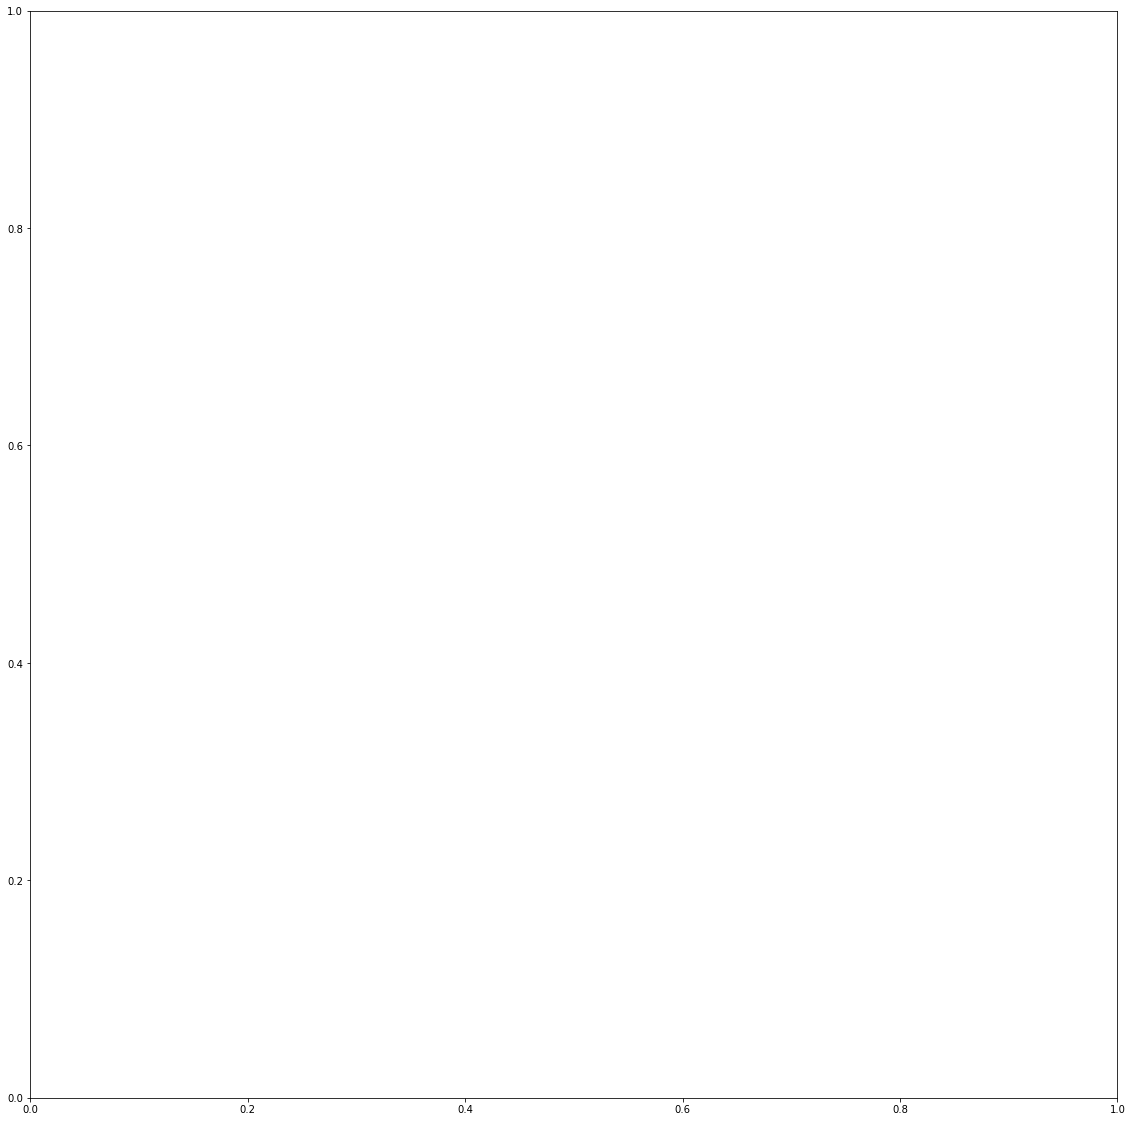

In [18]:
#Can I display my data to see it geographically? 
race.plot(figsize=(20,20))

Although my dataset has entries, it is not displaying it properly. I will try the same steps with a new data file.

In [19]:
race_ = gdp.read_file('Data/acs2019_5yr_B03002_14000US06037534001.geojson')

Now I will repeat the steps above to see if I can work with this file

In [20]:
race_.shape

(2347, 45)

In [22]:
pd.set_option('display.max_columns', None)

In [23]:
race_.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06037,"Los Angeles County, CA",10081570.0,0.0,5193136.0,0.0,2641770.0,1343.0,790252.0,2958.0,20831.0,1021.0,1454769.0,3676.0,24597.0,752.0,32413.0,2235.0,228504.0,5193.0,12628.0,1192.0,215876.0,4867.0,4888434.0,0.0,2526673.0,20454.0,30226.0,1992.0,52562.0,3040.0,18452.0,1143.0,3123.0,567.0,2083135.0,21995.0,174263.0,4915.0,103325.0,3658.0,70938.0,2605.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3095.0,354.0,2616.0,306.0,19.0,15.0,3.0,6.0,331.0,142.0,3.0,6.0,8.0,13.0,115.0,71.0,0.0,12.0,115.0,71.0,1188.0,414.0,731.0,310.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,383.0,311.0,74.0,52.0,34.0,28.0,40.0,46.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,3258.0,344.0,2882.0,358.0,74.0,102.0,15.0,24.0,220.0,156.0,0.0,12.0,0.0,12.0,67.0,65.0,0.0,12.0,67.0,65.0,147.0,86.0,99.0,66.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,48.0,55.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,3731.0,465.0,2986.0,435.0,198.0,165.0,0.0,17.0,486.0,101.0,0.0,17.0,47.0,75.0,14.0,25.0,0.0,17.0,14.0,25.0,2616.0,576.0,1661.0,572.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,874.0,477.0,81.0,80.0,48.0,62.0,33.0,51.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,2338.0,236.0,1812.0,271.0,87.0,107.0,0.0,12.0,341.0,120.0,0.0,12.0,0.0,12.0,98.0,74.0,0.0,12.0,98.0,74.0,1364.0,223.0,822.0,230.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,497.0,231.0,45.0,42.0,11.0,18.0,34.0,39.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [24]:
race_.tail()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
2342,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",1175.0,178.0,788.0,161.0,393.0,108.0,232.0,97.0,26.0,34.0,36.0,37.0,24.0,31.0,25.0,33.0,52.0,32.0,24.0,32.0,28.0,25.0,387.0,104.0,243.0,86.0,14.0,24.0,11.0,20.0,14.0,24.0,0.0,12.0,73.0,34.0,32.0,34.0,27.0,34.0,5.0,7.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2343,14000US06037980033,"Census Tract 9800.33, Los Angeles, CA",16.0,23.0,16.0,23.0,0.0,12.0,0.0,12.0,16.0,23.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.24897 33.75590, -118.2470..."
2344,14000US06037990100,"Census Tract 9901, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505..."
2345,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
2346,14000US06037990300,"Census Tract 9903, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.47656 33.75038, -118.4661..."


<AxesSubplot:>

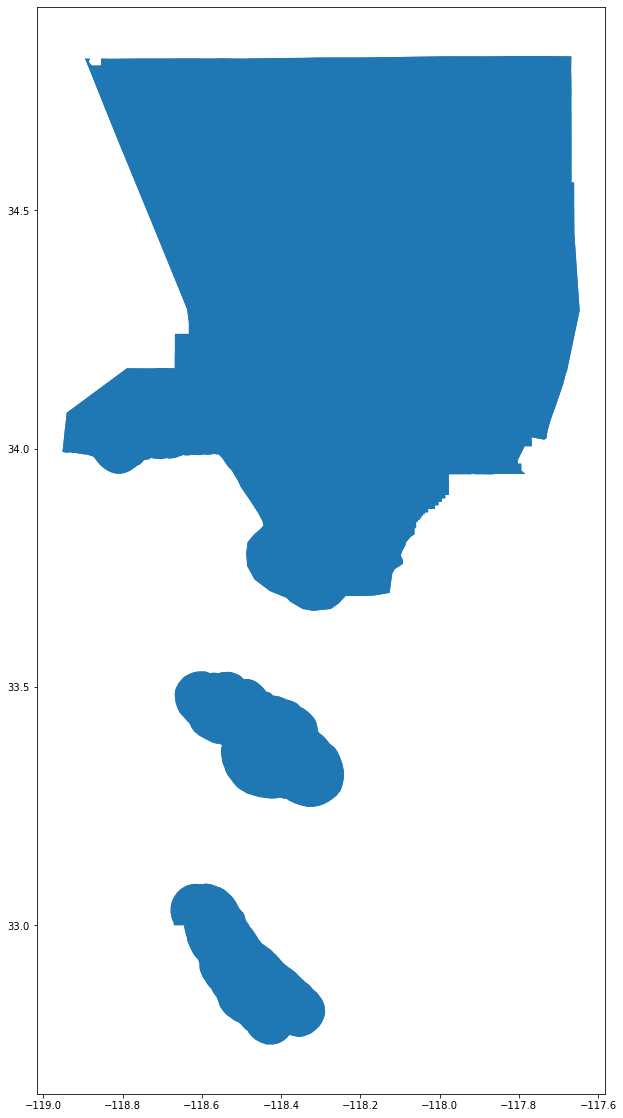

In [25]:
race_.plot(figsize=(20,20))

Now I can see that this data file allowed me to plot the data and I get oa geographic visual of it. Based on this plot, I can already begin to see LA County. But the displays on the left side look off, next I will begin to refine my data.

**Can I see the entire data in this file?** 

I will need to overwrite the default display setting in order to look at the entire data

In [28]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [29]:
race_.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
175,14000US06037123204,"Census Tract 1232.04, Los Angeles, CA",3129.0,285.0,842.0,144.0,530.0,128.0,143.0,86.0,0.0,12.0,143.0,97.0,0.0,12.0,0.0,12.0,26.0,30.0,0.0,12.0,26.0,30.0,2287.0,297.0,895.0,235.0,0.0,12.0,33.0,54.0,7.0,11.0,0.0,12.0,1321.0,353.0,31.0,36.0,8.0,12.0,23.0,34.0,"MULTIPOLYGON (((-118.39651 34.19757, -118.3953..."


so what type of data so I have?

In [27]:
race_.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2347 non-null   object  
 1   name              2347 non-null   object  
 2   B03002001         2347 non-null   float64 
 3   B03002001, Error  2347 non-null   float64 
 4   B03002002         2347 non-null   float64 
 5   B03002002, Error  2347 non-null   float64 
 6   B03002003         2347 non-null   float64 
 7   B03002003, Error  2347 non-null   float64 
 8   B03002004         2347 non-null   float64 
 9   B03002004, Error  2347 non-null   float64 
 10  B03002005         2347 non-null   float64 
 11  B03002005, Error  2347 non-null   float64 
 12  B03002006         2347 non-null   float64 
 13  B03002006, Error  2347 non-null   float64 
 14  B03002007         2347 non-null   float64 
 15  B03002007, Error  2347 non-null   float64 
 16  B03002008       

In [32]:
#In order to undestand the relationship between race and space, I analyze the GEOIDs in the file
race_.geoid.head()

0          05000US06037
1    14000US06037101110
2    14000US06037101122
3    14000US06037101210
4    14000US06037101220
Name: geoid, dtype: object

**Now I can begin trimming data so that I can analyze what I need**

In [33]:
race_.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06037,"Los Angeles County, CA",10081570.0,0.0,5193136.0,0.0,2641770.0,1343.0,790252.0,2958.0,20831.0,1021.0,1454769.0,3676.0,24597.0,752.0,32413.0,2235.0,228504.0,5193.0,12628.0,1192.0,215876.0,4867.0,4888434.0,0.0,2526673.0,20454.0,30226.0,1992.0,52562.0,3040.0,18452.0,1143.0,3123.0,567.0,2083135.0,21995.0,174263.0,4915.0,103325.0,3658.0,70938.0,2605.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3095.0,354.0,2616.0,306.0,19.0,15.0,3.0,6.0,331.0,142.0,3.0,6.0,8.0,13.0,115.0,71.0,0.0,12.0,115.0,71.0,1188.0,414.0,731.0,310.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,383.0,311.0,74.0,52.0,34.0,28.0,40.0,46.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,3258.0,344.0,2882.0,358.0,74.0,102.0,15.0,24.0,220.0,156.0,0.0,12.0,0.0,12.0,67.0,65.0,0.0,12.0,67.0,65.0,147.0,86.0,99.0,66.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,48.0,55.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,3731.0,465.0,2986.0,435.0,198.0,165.0,0.0,17.0,486.0,101.0,0.0,17.0,47.0,75.0,14.0,25.0,0.0,17.0,14.0,25.0,2616.0,576.0,1661.0,572.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,874.0,477.0,81.0,80.0,48.0,62.0,33.0,51.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,2338.0,236.0,1812.0,271.0,87.0,107.0,0.0,12.0,341.0,120.0,0.0,12.0,0.0,12.0,98.0,74.0,0.0,12.0,98.0,74.0,1364.0,223.0,822.0,230.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,497.0,231.0,45.0,42.0,11.0,18.0,34.0,39.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


I want to get rid of the row with index 0 because it includes the entire county

In [34]:
race_ = race_.drop([0])

In [35]:
race_.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3095.0,354.0,2616.0,306.0,19.0,15.0,3.0,6.0,331.0,142.0,3.0,6.0,8.0,13.0,115.0,71.0,0.0,12.0,115.0,71.0,1188.0,414.0,731.0,310.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,383.0,311.0,74.0,52.0,34.0,28.0,40.0,46.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,3258.0,344.0,2882.0,358.0,74.0,102.0,15.0,24.0,220.0,156.0,0.0,12.0,0.0,12.0,67.0,65.0,0.0,12.0,67.0,65.0,147.0,86.0,99.0,66.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,48.0,55.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,3731.0,465.0,2986.0,435.0,198.0,165.0,0.0,17.0,486.0,101.0,0.0,17.0,47.0,75.0,14.0,25.0,0.0,17.0,14.0,25.0,2616.0,576.0,1661.0,572.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,874.0,477.0,81.0,80.0,48.0,62.0,33.0,51.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,2338.0,236.0,1812.0,271.0,87.0,107.0,0.0,12.0,341.0,120.0,0.0,12.0,0.0,12.0,98.0,74.0,0.0,12.0,98.0,74.0,1364.0,223.0,822.0,230.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,497.0,231.0,45.0,42.0,11.0,18.0,34.0,39.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,394.0,3587.0,363.0,3126.0,359.0,205.0,232.0,0.0,12.0,194.0,119.0,0.0,12.0,0.0,12.0,62.0,44.0,0.0,12.0,62.0,44.0,297.0,146.0,224.0,142.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,45.0,38.0,28.0,32.0,28.0,32.0,0.0,12.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Now, I can begin dropping the columns I don't need

In [36]:
list(race_)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

I want to capture data for Hispanic or Latino (ethnicity) and the races listed who did not idenify with that ethnicity.

In [37]:
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

How does my data look like now?

In [38]:
race_=race_[columns_to_keep]

In [39]:
race_.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Now I can see only the variables I wanted to keep are displaying. But the titles can be confusing, so I will rename them.

In [40]:
list(race_)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [42]:
race_.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [43]:
race_.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Now I can see how my new display gives me defined data

#**Sorting**

I can now begin to sort my data so I can understand demographic changes by geography

In [48]:
race_sorted = race_.sort_values(by='Total',ascending = False)

In [49]:
race_sorted[['geoid','Total']].head(10)

,geoid,Total
2198,14000US06037901004,12463.0
923,14000US06037275602,12100.0
848,14000US06037265301,11977.0
2236,14000US06037910705,11613.0
2206,14000US06037901205,10783.0
2275,14000US06037920037,10318.0
2147,14000US06037702901,9852.0
994,14000US06037300600,9609.0
532,14000US06037206020,8947.0
2192,14000US06037900803,8751.0


In [62]:
#I want to create a column with percent totals
race_['Percent Non Hispanic'] = race_['Non Hispanic']/race_['Total']*100
race_['Percent Non Hispanic White'] = race_['Non Hispanic White']/race_['Total']*100
race_['Percent Non Hispanic Black'] = race_['Non Hispanic Black']/race_['Total']*100
race_['Percent Non Hispanic American Indian and Alaska Native'] = race_['Non Hispanic American Indian and Alaska Native']/race_['Total']*100
race_['Percent Non Hispanic Asian'] = race_['Non Hispanic Asian']/race_['Total']*100
race_['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = race_['Non Hispanic Native Hawaiian and Other Pacific Islander']/race_['Total']*100
race_['Percent Non Hispanic Some other race'] = race_['Non Hispanic Some other race']/race_['Total']*100
race_['Percent Non Hispanic Two or more races'] = race_['Non Hispanic Two or more races']/race_['Total']*100
race_['Percent Hispanic'] = race_['Hispanic']/race_['Total']*100

In [63]:
race_.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry,Percent Non Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races,Percent Hispanic
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",72.262433,61.078683,0.443614,0.070044,7.728228,0.070044,0.186785,2.685034,27.737567
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",95.682819,84.640235,2.173275,0.440529,6.461087,0.000000,0.000000,1.967695,4.317181
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",58.783677,47.045848,3.119584,0.000000,7.657161,0.000000,0.740507,0.220577,41.216323
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",63.155051,48.946515,2.350081,0.000000,9.211237,0.000000,0.000000,2.647218,36.844949
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",92.353244,80.484037,5.278064,0.000000,4.994851,0.000000,0.000000,1.596292,7.646756


Now I want to map the percentage of latinx folks, since liturate suggest there is high populations living in mobile homes

<AxesSubplot:>

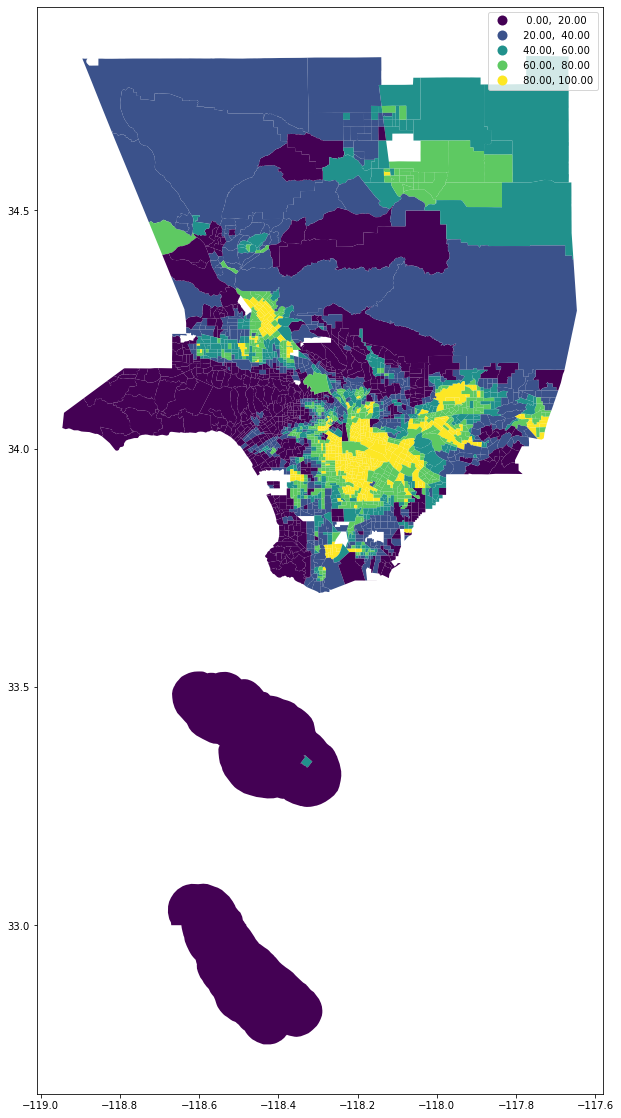

In [64]:
race_.plot(figsize=(20,20),
         column='Percent Hispanic',
         legend=True,
         scheme='equal_interval')

I want to undestand the demographics of the areas with higher concentrations of mobile homes. Where is there more non-white, Black, Indigenous, People of Color (BIPOC) concenrations? I will need to create a new column.

In [65]:
race_['Percent Non white'] = race_['Percent Non Hispanic Black'] + race_['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] + race_['Percent Non Hispanic Asian'] + race_['Percent Non Hispanic Some other race'] + race_['Percent Non Hispanic Two or more races'] + race_['Percent Hispanic'] + race_['Percent Non Hispanic American Indian and Alaska Native']

In [66]:
race_.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry,Percent Non Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races,Percent Hispanic,Percent Non white
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",72.262433,61.078683,0.443614,0.070044,7.728228,0.070044,0.186785,2.685034,27.737567,38.921317
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",95.682819,84.640235,2.173275,0.440529,6.461087,0.000000,0.000000,1.967695,4.317181,15.359765
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",58.783677,47.045848,3.119584,0.000000,7.657161,0.000000,0.740507,0.220577,41.216323,52.954152
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",63.155051,48.946515,2.350081,0.000000,9.211237,0.000000,0.000000,2.647218,36.844949,51.053485
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",92.353244,80.484037,5.278064,0.000000,4.994851,0.000000,0.000000,1.596292,7.646756,19.515963


I want to ensure then entegrity of my data

In [68]:
percent_random_tract = race_.sample()
percent_random_tract

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry,Percent Non Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races,Percent Hispanic,Percent Non white
1216,14000US06037407400,"Census Tract 4074, Los Angeles, CA",1977.0,1084.0,222.0,117.0,0.0,567.0,25.0,0.0,153.0,893.0,"MULTIPOLYGON (((-117.96379 34.05264, -117.9619...",54.830551,11.229135,5.918058,0.0,28.679818,1.264542,0.0,7.738998,45.169449,88.770865


In [69]:
percent_random_tract.iloc[0]['Percent Non white']

88.77086494688923

In [70]:
(percent_random_tract.iloc[0]['Percent Non Hispanic Black'] + 
      percent_random_tract.iloc[0]['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] + 
      percent_random_tract.iloc[0]['Percent Non Hispanic Asian'] + 
      percent_random_tract.iloc[0]['Percent Non Hispanic Some other race'] + 
      percent_random_tract.iloc[0]['Percent Non Hispanic Two or more races'] +
      percent_random_tract.iloc[0]['Percent Hispanic'] +
      percent_random_tract.iloc[0]['Percent Non Hispanic American Indian and Alaska Native'])

88.77086494688923

This shows me my columns are correct since both calculations are the same. Now I can plot this new column to get an idead of the BIPOC demographics in the County.

<AxesSubplot:>

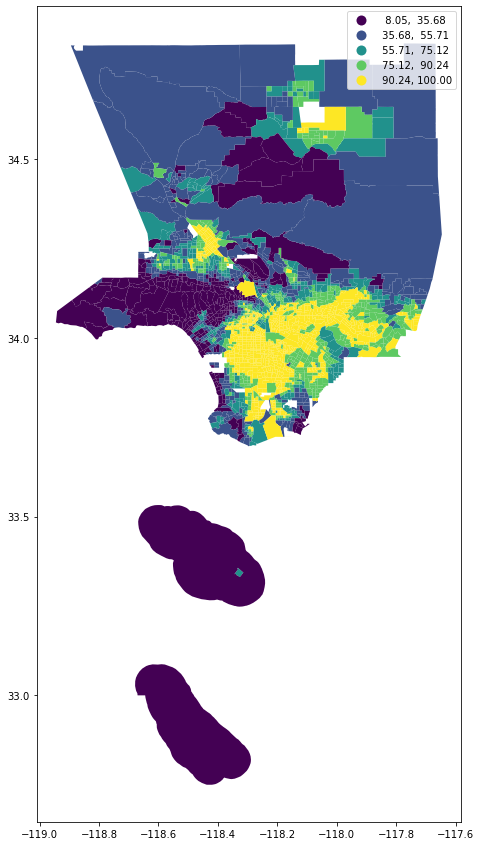

In [74]:
race_.plot(figsize=(20,15),
                 column='Percent Non white',
                 legend=True, 
                 scheme='NaturalBreaks')

**Now I want to see Black demographic data in a map so I can compare it to my mobile home park data**

In [81]:
race_web_mercator = race_.to_crs(epsg=3857)

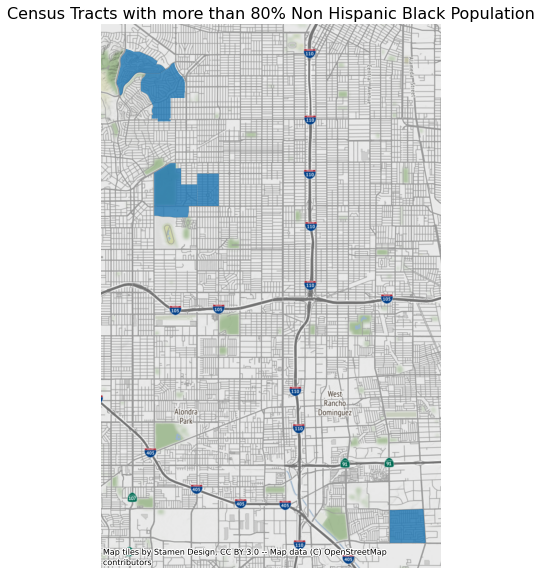

In [86]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(10, 10))

# add the layer with ax=ax in the argument 
race_web_mercator[race_web_mercator['Percent Non Hispanic Black'] > 80].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 80% Non Hispanic Black Population',fontsize=16)

# add a basemap
ctx.add_basemap(ax)